In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Dataton/data/"
DATA_PATH

'/content/drive/MyDrive/Dataton/data/'

- SEED 값

In [ ]:
SEED = 42

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

# train = pd.read_csv(f"{DATA_PATH}train.csv") # 학습용 구매기록 데이터
# test = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트용 구매기록 데이터

In [ ]:
train = pd.read_csv(f"{DATA_PATH}train.csv")
test = pd.read_csv(f"{DATA_PATH}test.csv")

columns_map = {
    "id": "승객ID",
    "Gender": "성별",
    "Age": "나이",
    "Customer Type": "고객유형",
    "Type of Travel": "여행유형",
    "Class": "좌석등급",
    "Flight Distance": "비행거리",
    "Departure/Arrival time convenient": "시간편리성",
    "Departure Delay in Minutes": "출발지연",
    "Arrival Delay in Minutes": "도착지연",
    "Inflight wifi service": "기내와이파이",
    "Food and drink": "기내식",
    "Inflight entertainment": "기내엔터테인먼트",
    "On-board service": "탑승서비스",
    "Leg room service": "좌석공간",
    "Baggage handling": "수하물처리",
    "Checkin service": "체크인서비스",
    "Inflight service": "기내서비스",
    "Cleanliness": "청결도",
    "satisfaction": "만족도"
}

train.rename(columns=columns_map, inplace=True)
test.rename(columns=columns_map, inplace=True)

value_mappings = {
    "성별": {"Male": "남성", "Female": "여성"},
    "고객유형": {"Loyal Customer": "충성", "disloyal Customer": "비충성"},
    "여행유형": {"Business travel": "출장", "Personal Travel": "개인"},
    "좌석등급": {"Eco": "이코노미", "Eco Plus": "이코노미 플러스", "Business": "비즈니스"},
    "만족도": {"satisfied": "만족", "neutral or dissatisfied": "중립 또는 불만족"}
}

for column, mapping in value_mappings.items():
    if column in train.columns:
        train[column] = train[column].map(mapping)
        test[column] = test[column].map(mapping)

In [ ]:
from IPython.display import display, HTML
br_html = HTML("<br><br>")
display(HTML("<h1>학습용 구매기록 데이터</h1>"), train.head(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"), test.head(), br_html)

,Unnamed: 0,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,만족도
0,0,70172,남성,충성,13,개인,이코노미 플러스,460,3,4,...,5,4,3,4,4,5,5,25,18.0,중립 또는 불만족
1,1,5047,남성,비충성,25,출장,비즈니스,235,3,2,...,1,1,5,3,1,4,1,1,6.0,중립 또는 불만족
2,2,110028,여성,충성,26,출장,비즈니스,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,만족
3,3,24026,여성,충성,25,출장,비즈니스,562,2,5,...,2,2,5,3,1,4,2,11,9.0,중립 또는 불만족
4,4,119299,남성,충성,61,출장,비즈니스,214,3,3,...,3,3,4,4,3,3,3,0,0.0,만족


,Unnamed: 0,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,만족도
0,0,19556,여성,충성,52,출장,이코노미,160,5,4,...,5,5,5,5,2,5,5,50,44.0,만족
1,1,90035,여성,충성,36,출장,비즈니스,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,만족
2,2,12360,남성,비충성,20,출장,이코노미,192,2,0,...,2,4,1,3,2,2,2,0,0.0,중립 또는 불만족
3,3,77959,남성,충성,44,출장,비즈니스,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,만족
4,4,36875,여성,충성,49,출장,이코노미,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,만족


In [ ]:
display(HTML("<h1>학습용 구매기록 데이터</h1>"))
display(train.info(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"))
display(test.info(), br_html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              103904 non-null  int64  
 1   승객ID                    103904 non-null  int64  
 2   성별                      103904 non-null  object 
 3   고객유형                    103904 non-null  object 
 4   나이                      103904 non-null  int64  
 5   여행유형                    103904 non-null  object 
 6   좌석등급                    103904 non-null  object 
 7   비행거리                    103904 non-null  int64  
 8   기내와이파이                  103904 non-null  int64  
 9   시간편리성                   103904 non-null  int64  
 10  Ease of Online booking  103904 non-null  int64  
 11  Gate location           103904 non-null  int64  
 12  기내식                     103904 non-null  int64  
 13  Online boarding         103904 non-null  int64  
 14  Seat comfort        

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              25976 non-null  int64  
 1   승객ID                    25976 non-null  int64  
 2   성별                      25976 non-null  object 
 3   고객유형                    25976 non-null  object 
 4   나이                      25976 non-null  int64  
 5   여행유형                    25976 non-null  object 
 6   좌석등급                    25976 non-null  object 
 7   비행거리                    25976 non-null  int64  
 8   기내와이파이                  25976 non-null  int64  
 9   시간편리성                   25976 non-null  int64  
 10  Ease of Online booking  25976 non-null  int64  
 11  Gate location           25976 non-null  int64  
 12  기내식                     25976 non-null  int64  
 13  Online boarding         25976 non-null  int64  
 14  Seat comfort            25976 non-null

None

In [ ]:
test.head()

,Unnamed: 0,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,만족도
0,0,19556,여성,충성,52,출장,이코노미,160,5,4,...,5,5,5,5,2,5,5,50,44.0,만족
1,1,90035,여성,충성,36,출장,비즈니스,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,만족
2,2,12360,남성,비충성,20,출장,이코노미,192,2,0,...,2,4,1,3,2,2,2,0,0.0,중립 또는 불만족
3,3,77959,남성,충성,44,출장,비즈니스,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,만족
4,4,36875,여성,충성,49,출장,이코노미,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,만족


In [ ]:
train['성별'].unique()

array(['남성', '여성'], dtype=object)

In [ ]:
train['고객유형'].unique()

array(['충성', '비충성'], dtype=object)

In [ ]:
train['여행유형'].unique()

array(['개인', '출장'], dtype=object)

In [ ]:
train['좌석등급'].unique()

array(['이코노미 플러스', '비즈니스', '이코노미'], dtype=object)

In [ ]:
train['만족도'].unique()

array(['중립 또는 불만족', '만족'], dtype=object)

- 타겟 데이터

In [ ]:
train['만족도']

,만족도
0,중립 또는 불만족
1,중립 또는 불만족
2,만족
3,중립 또는 불만족
4,만족
...,...
103899,중립 또는 불만족
103900,만족
103901,중립 또는 불만족
103902,중립 또는 불만족


In [ ]:
target = (train['만족도'] == '만족').astype(int)
target

,만족도
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


# EDA

In [ ]:
train_ft = train.drop(columns=['만족도', 'Unnamed: 0']).copy()
test_ft = test.drop(columns=['만족도', 'Unnamed: 0']).copy()

In [ ]:
train_ft.describe()

,승객ID,나이,비행거리,기내와이파이,시간편리성,Ease of Online booking,Gate location,기내식,Online boarding,Seat comfort,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['10대이하', '10대', '20대', '30대', '40대', '50대', '60대이상']
train_ft['연령대'] = pd.cut(train_ft['나이'], bins=bins, labels=labels)
train_ft

,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,Ease of Online booking,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,연령대
0,70172,남성,충성,13,개인,이코노미 플러스,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,10대
1,5047,남성,비충성,25,출장,비즈니스,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,20대
2,110028,여성,충성,26,출장,비즈니스,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,20대
3,24026,여성,충성,25,출장,비즈니스,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,20대
4,119299,남성,충성,61,출장,비즈니스,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,60대이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,여성,비충성,23,출장,이코노미,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,20대
103900,73097,남성,충성,49,출장,비즈니스,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,40대
103901,68825,남성,비충성,30,출장,비즈니스,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,20대
103902,54173,여성,비충성,22,출장,이코노미,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,20대


In [ ]:
agg_list = {
    ('남성', lambda x: x[(x.str.contains("남성"))].count()),
    ('여성', lambda x: x[(x.str.contains("여성"))].count())
}

result = train_ft.groupby('연령대')['성별'].agg(agg_list).reset_index()

# 2. 총합 컬럼 추가
result['총합'] = result['남성'] + result['여성']

# 3. 비율 계산
result['남성_비율'] = result['남성'] / result['총합']
result['여성_비율'] = result['여성'] / result['총합']

result

<ipython-input-21-95cf86ddf129>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = train_ft.groupby('연령대')['성별'].agg(agg_list).reset_index()


,연령대,남성,여성,총합,남성_비율,여성_비율
0,10대이하,1285,1292,2577,0.498642,0.501358
1,10대,4258,4498,8756,0.486295,0.513705
2,20대,10235,11189,21424,0.477735,0.522265
3,30대,10606,10597,21203,0.500212,0.499788
4,40대,11505,11694,23199,0.495927,0.504073
5,50대,9351,9418,18769,0.498215,0.501785
6,60대이상,3937,4039,7976,0.493606,0.506394


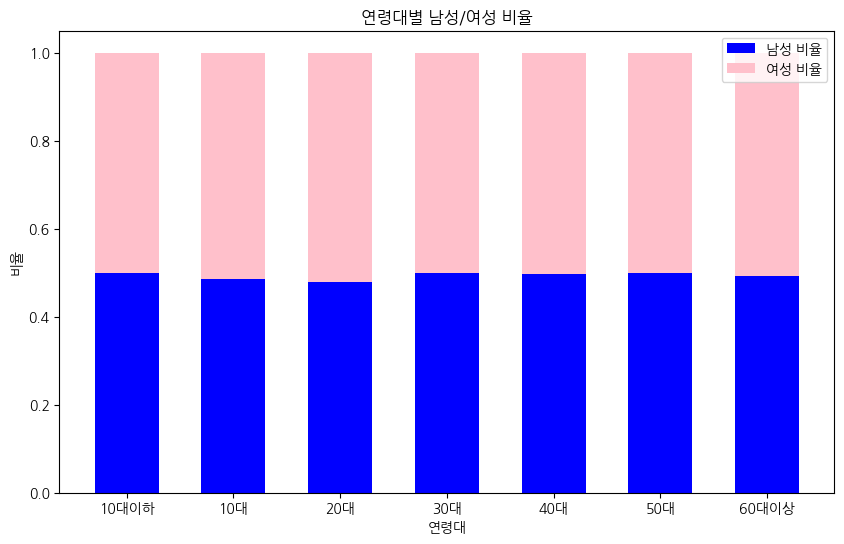

In [ ]:
# 데이터 준비
categories = result['연령대']
male_ratios = result['남성_비율']
female_ratios = result['여성_비율']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프
bar_width = 0.6  # 막대 폭
x = np.arange(len(categories))  # 연령대의 위치

# 남성 비율
plt.bar(x, male_ratios, width=bar_width, label='남성 비율', color='blue')

# 여성 비율 (남성 위에 쌓임)
plt.bar(x, female_ratios, width=bar_width, label='여성 비율', color='pink', bottom=male_ratios)

# 그래프 꾸미기
plt.xlabel('연령대')
plt.ylabel('비율')
plt.title('연령대별 남성/여성 비율')
plt.xticks(x, categories)  # x축에 연령대 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
agg_list = {
    ('개인', lambda x: x[(x.str.contains("개인"))].count()),
    ('출장', lambda x: x[(x.str.contains("출장"))].count())
}

result = train_ft.groupby('연령대')['여행유형'].agg(agg_list).reset_index()

# 2. 총합 컬럼 추가
result['총합'] = result['개인'] + result['출장']

# 3. 비율 계산
result['개인_비율'] = result['개인'] / result['총합']
result['출장_비율'] = result['출장'] / result['총합']

result

<ipython-input-23-2e96891bd525>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = train_ft.groupby('연령대')['여행유형'].agg(agg_list).reset_index()


,연령대,출장,개인,총합,개인_비율,출장_비율
0,10대이하,531,2046,2577,0.793946,0.206054
1,10대,3592,5164,8756,0.589767,0.410233
2,20대,16437,4987,21424,0.232776,0.767224
3,30대,16122,5081,21203,0.239636,0.760364
4,40대,18169,5030,23199,0.216820,0.783180
5,50대,13745,5024,18769,0.267675,0.732325
6,60대이상,3059,4917,7976,0.616474,0.383526


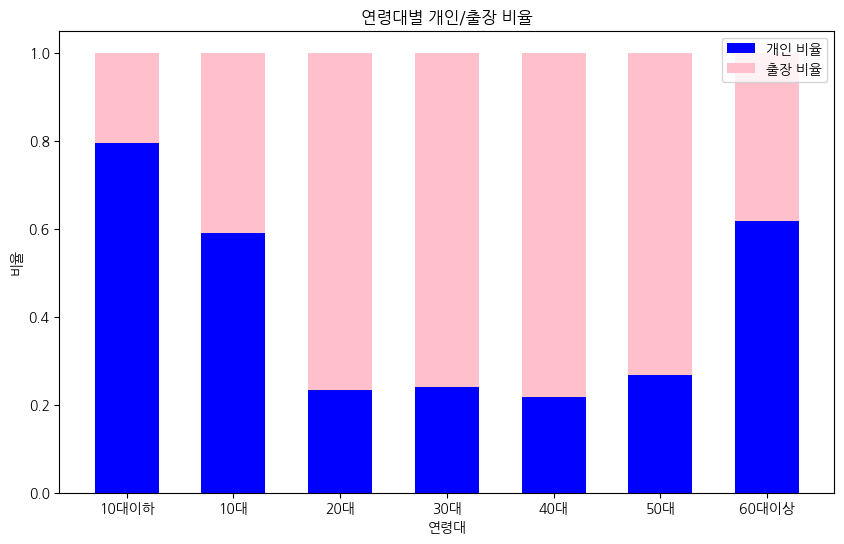

In [ ]:
# 데이터 준비
categories = result['연령대']
male_ratios = result['개인_비율']
female_ratios = result['출장_비율']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프
bar_width = 0.6  # 막대 폭
x = np.arange(len(categories))  # 연령대의 위치

# 남성 비율
plt.bar(x, male_ratios, width=bar_width, label='개인 비율', color='blue')

# 여성 비율 (남성 위에 쌓임)
plt.bar(x, female_ratios, width=bar_width, label='출장 비율', color='pink', bottom=male_ratios)

# 그래프 꾸미기
plt.xlabel('연령대')
plt.ylabel('비율')
plt.title('연령대별 개인/출장 비율')
plt.xticks(x, categories)  # x축에 연령대 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
agg_list = {
    ('이코노미 플러스', lambda x: x[(x.str.contains("이코노미 플러스"))].count()),
    ('이코노미', lambda x: x[(x.str.contains("이코노미"))].count()),
    ('비즈니스', lambda x: x[(x.str.contains("비즈니스"))].count())
}

result = train_ft.groupby('연령대')['좌석등급'].agg(agg_list).reset_index()

# 2. 총합 컬럼 추가
result['총합'] = result['이코노미 플러스'] + result['이코노미'] + result['비즈니스']

# 3. 비율 계산
result['이코노미 플러스_비율'] = result['이코노미 플러스'] / result['총합']
result['이코노미_비율'] = result['이코노미'] / result['총합']
result['비즈니스_비율'] = result['비즈니스'] / result['총합']

result

<ipython-input-25-209eae030182>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = train_ft.groupby('연령대')['좌석등급'].agg(agg_list).reset_index()


,연령대,비즈니스,이코노미 플러스,이코노미,총합,이코노미 플러스_비율,이코노미_비율,비즈니스_비율
0,10대이하,352,306,2225,2883,0.106139,0.771766,0.122095
1,10대,1773,819,6983,9575,0.085535,0.729295,0.185170
2,20대,9047,1505,12377,22929,0.065637,0.539797,0.394566
3,30대,11303,1567,9900,22770,0.068819,0.434783,0.496399
4,40대,14053,1319,9146,24518,0.053797,0.373032,0.573171
5,50대,11018,1101,7751,19870,0.055410,0.390086,0.554504
6,60대이상,2119,877,5857,8853,0.099062,0.661584,0.239354


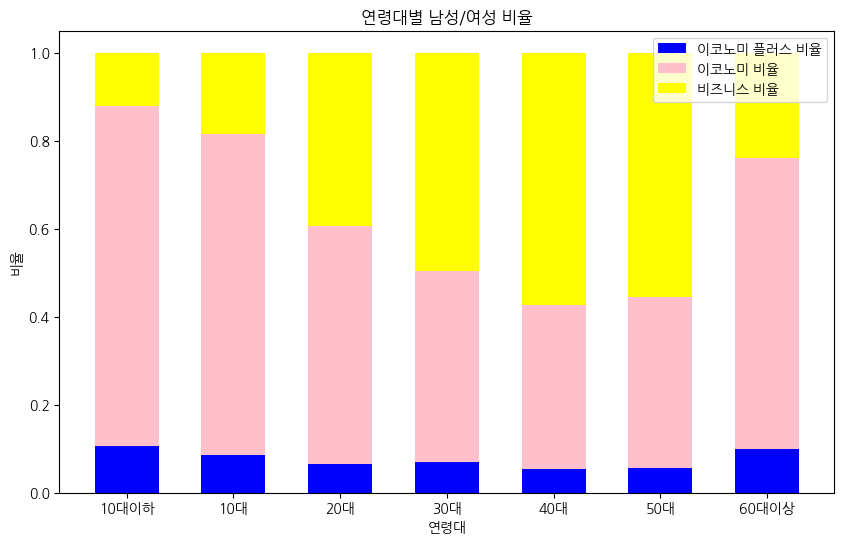

In [ ]:
# 데이터 준비
categories = result['연령대']
male_ratios = result['이코노미 플러스_비율']
female_ratios = result['이코노미_비율']
b_ratios = result['비즈니스_비율']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프
bar_width = 0.6  # 막대 폭
x = np.arange(len(categories))  # 연령대의 위치

# 남성 비율
plt.bar(x, male_ratios, width=bar_width, label='이코노미 플러스 비율', color='blue')

# 여성 비율 (남성 위에 쌓임)
plt.bar(x, female_ratios, width=bar_width, label='이코노미 비율', color='pink', bottom=male_ratios)

plt.bar(x, b_ratios, width=bar_width, label='비즈니스 비율', color='yellow', bottom=male_ratios+female_ratios)

# 그래프 꾸미기
plt.xlabel('연령대')
plt.ylabel('비율')
plt.title('연령대별 남성/여성 비율')
plt.xticks(x, categories)  # x축에 연령대 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
agg_list = {
    ('충성', lambda x: x[(x.str.contains("충성"))].count()),
    ('비충성', lambda x: x[(x.str.contains("비충성"))].count()),
}

result = train_ft.groupby('연령대')['고객유형'].agg(agg_list).reset_index()

# 2. 총합 컬럼 추가
result['총합'] = result['충성'] + result['비충성']

# 3. 비율 계산
result['충성_비율'] = result['충성'] / result['총합']
result['비충성_비율'] = result['비충성'] / result['총합']

result

<ipython-input-27-73d8e114c968>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = train_ft.groupby('연령대')['고객유형'].agg(agg_list).reset_index()


,연령대,충성,비충성,총합,충성_비율,비충성_비율
0,10대이하,2577,268,2845,0.905800,0.094200
1,10대,8756,2107,10863,0.806039,0.193961
2,20대,21424,9356,30780,0.696036,0.303964
3,30대,21203,4335,25538,0.830253,0.169747
4,40대,23199,1942,25141,0.922756,0.077244
5,50대,18769,573,19342,0.970375,0.029625
6,60대이상,7976,400,8376,0.952245,0.047755


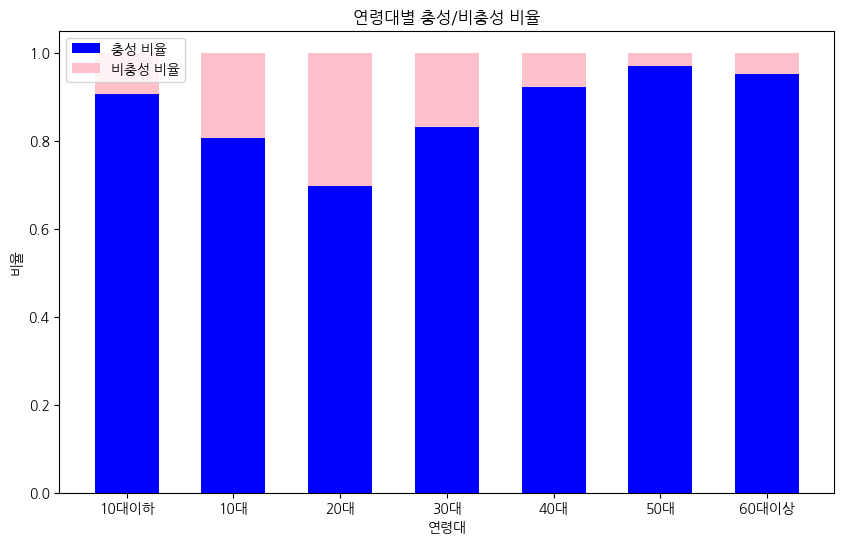

In [ ]:
# 데이터 준비
categories = result['연령대']
male_ratios = result['충성_비율']
female_ratios = result['비충성_비율']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프
bar_width = 0.6  # 막대 폭
x = np.arange(len(categories))  # 연령대의 위치

# 남성 비율
plt.bar(x, male_ratios, width=bar_width, label='충성 비율', color='blue')

# 여성 비율 (남성 위에 쌓임)
plt.bar(x, female_ratios, width=bar_width, label='비충성 비율', color='pink', bottom=male_ratios)

# 그래프 꾸미기
plt.xlabel('연령대')
plt.ylabel('비율')
plt.title('연령대별 충성/비충성 비율')
plt.xticks(x, categories)  # x축에 연령대 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
train_ft.groupby('좌석등급')[train_ft.columns[6:20]].mean()

,비행거리,기내와이파이,시간편리성,Ease of Online booking,Gate location,기내식,Online boarding,Seat comfort,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스
좌석등급,,,,,,,,,,,,,,
비즈니스,1675.976925,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579
이코노미,743.439748,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921
이코노미 플러스,747.125567,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444


In [ ]:
len(set(train_ft['승객ID']))

103904

In [ ]:
train_ft["도착지연"] = train_ft["도착지연"].fillna(0)

In [ ]:
train_ft.isnull().sum()

,0
승객ID,0
성별,0
고객유형,0
나이,0
여행유형,0
좌석등급,0
비행거리,0
기내와이파이,0
시간편리성,0
Ease of Online booking,0


In [ ]:
max(train_ft['출발지연']), min(train_ft['출발지연'])

(1592, 0)

In [ ]:
max(train_ft['도착지연']), min(train_ft['도착지연'])

(1584.0, 0.0)

In [ ]:
data_unique_cnt = []
data_unique = []
for i in train_ft.columns.values:
    data_unique_cnt.append(len(train_ft[i].unique()))
    data_unique.append(train_ft[i].unique())
unique_train = pd.DataFrame()
unique_train['Columns'] = list(train_ft.columns)
unique_train['Unique_value_Count'] = data_unique_cnt
unique_train['Unique_value'] = data_unique
unique_train

,Columns,Unique_value_Count,Unique_value
0,승객ID,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
1,성별,2,"[남성, 여성]"
2,고객유형,2,"[충성, 비충성]"
3,나이,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
4,여행유형,2,"[개인, 출장]"
5,좌석등급,3,"[이코노미 플러스, 비즈니스, 이코노미]"
6,비행거리,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
7,기내와이파이,6,"[3, 2, 4, 1, 5, 0]"
8,시간편리성,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


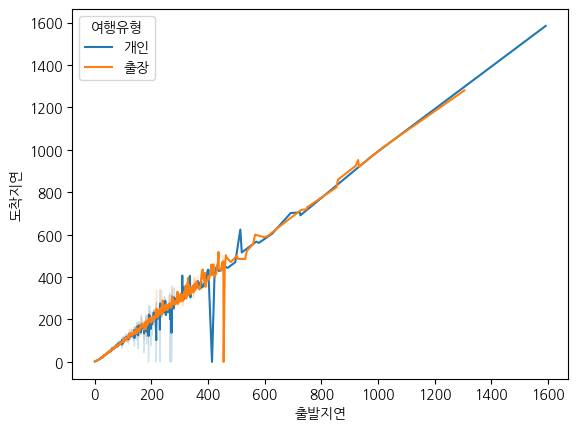

In [ ]:
sns.lineplot(train_ft, x = "출발지연", y = "도착지연", hue='여행유형')
plt.show()

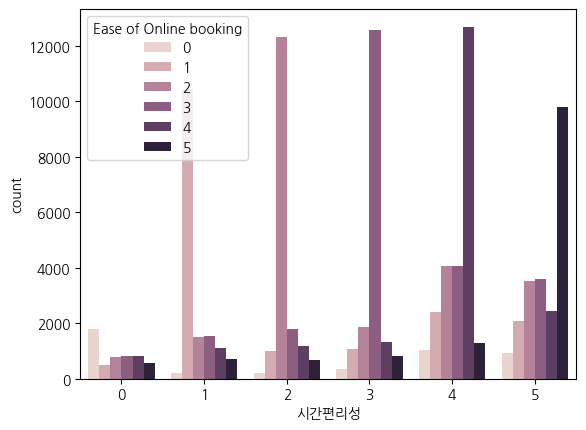

In [ ]:
sns.countplot(train_ft, x = "시간편리성", hue="Ease of Online booking")
plt.show()

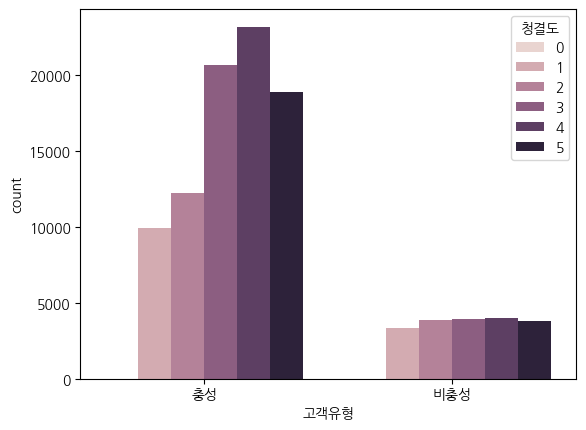

In [ ]:
sns.countplot(train_ft, x = "고객유형", hue="청결도")
plt.show()

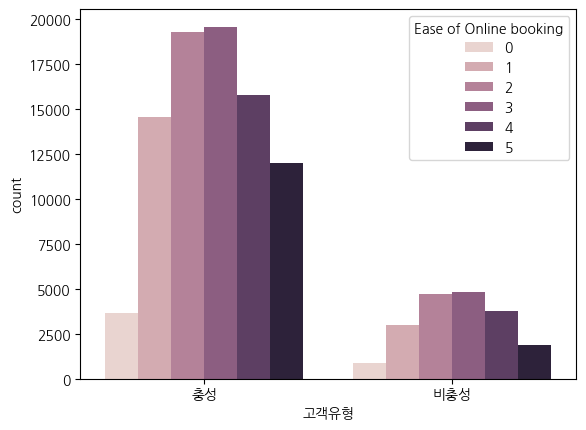

In [ ]:
sns.countplot(train_ft, x = "고객유형", hue="Ease of Online booking")
plt.show()

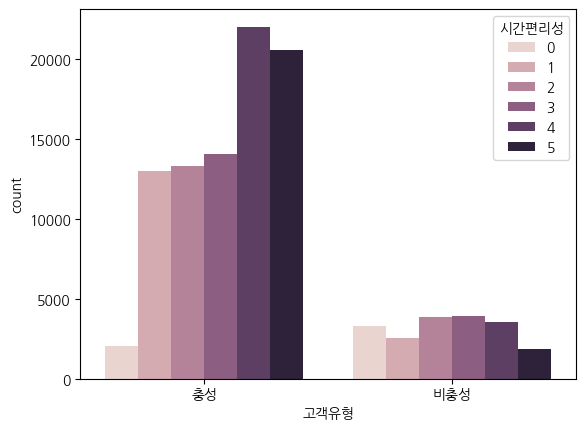

In [ ]:
sns.countplot(train_ft, x = "고객유형", hue="시간편리성")
plt.show()

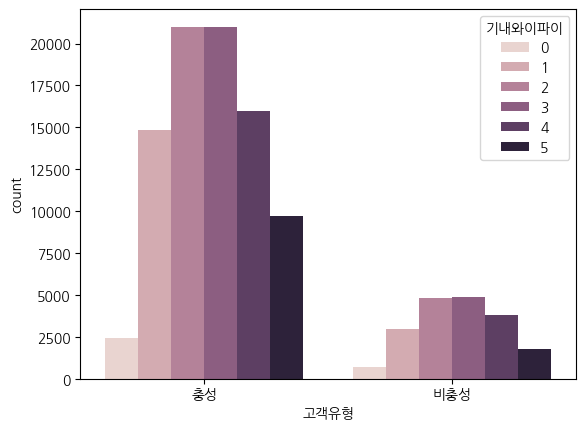

In [ ]:
sns.countplot(train_ft, x = "고객유형", hue="기내와이파이")
plt.show()

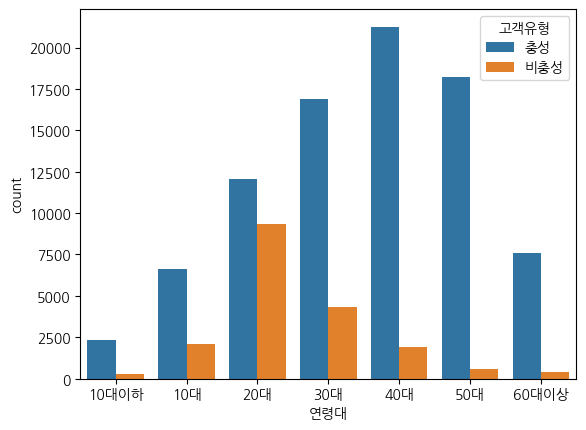

In [ ]:
sns.countplot(train_ft, x = "연령대", hue="고객유형")
plt.show()

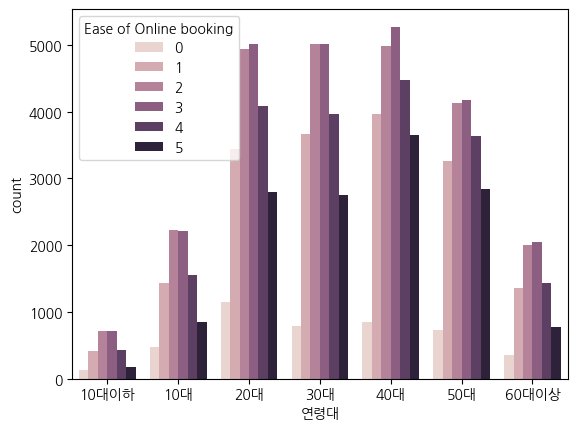

In [ ]:
sns.countplot(train_ft, x = "연령대", hue="Ease of Online booking")
plt.show()

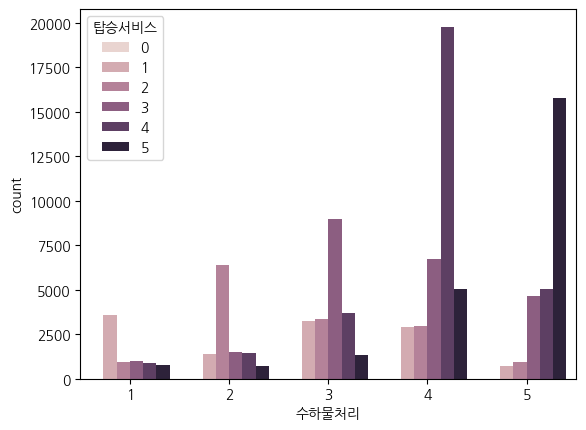

In [ ]:
sns.countplot(train_ft, x = "수하물처리", hue="탑승서비스")
plt.show()

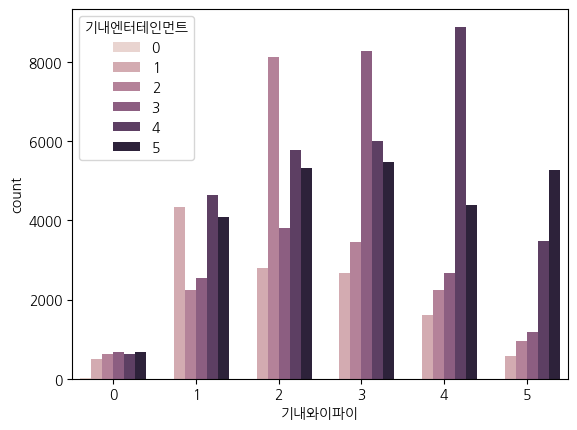

In [ ]:
sns.countplot(train_ft, x = "기내와이파이", hue="기내엔터테인먼트")
plt.show()

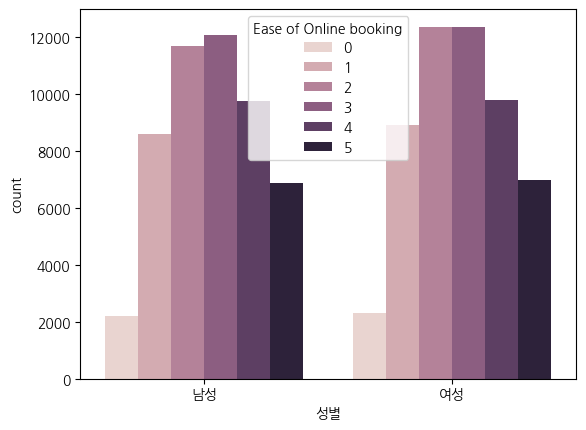

In [ ]:
sns.countplot(train_ft, x = "성별", hue="Ease of Online booking")
plt.show()

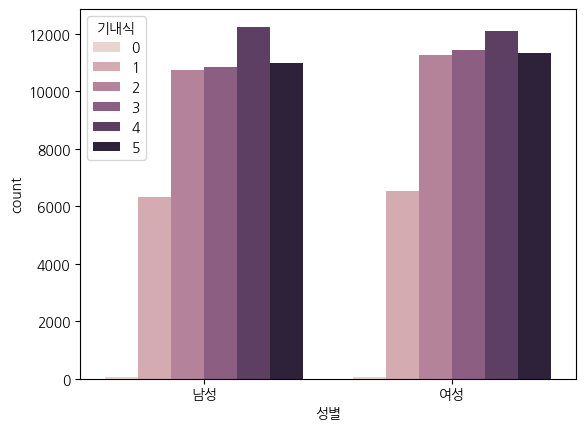

In [ ]:
sns.countplot(train_ft, x = "성별", hue="기내식")
plt.show()

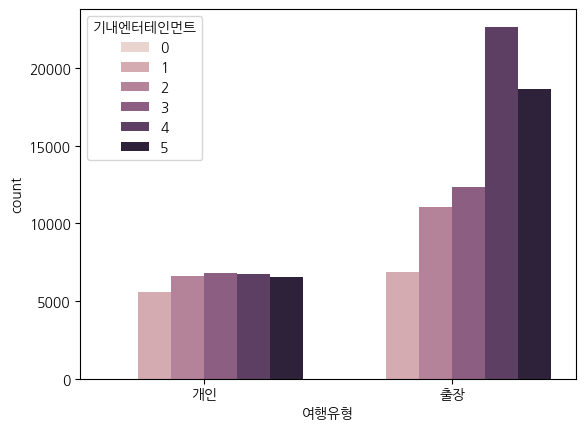

In [ ]:
sns.countplot(train_ft, x = "여행유형", hue="기내엔터테인먼트")
plt.show()

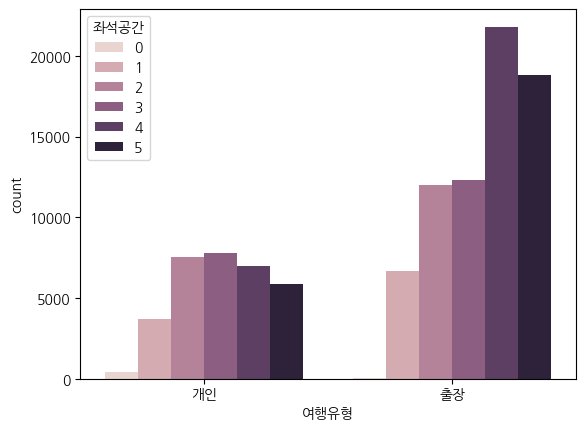

In [ ]:
sns.countplot(train_ft, x = "여행유형", hue="좌석공간")
plt.show()

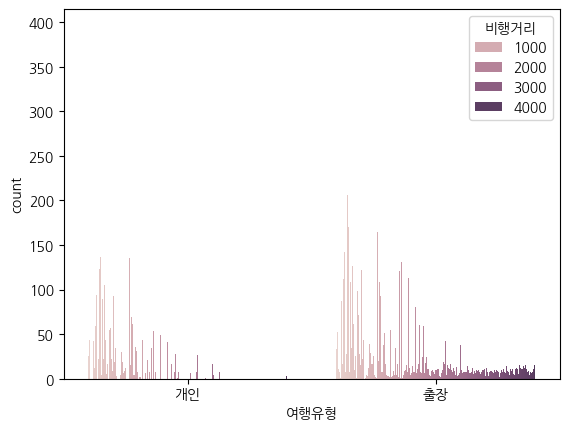

In [ ]:
sns.countplot(train_ft, x = "여행유형", hue="비행거리")
plt.show()

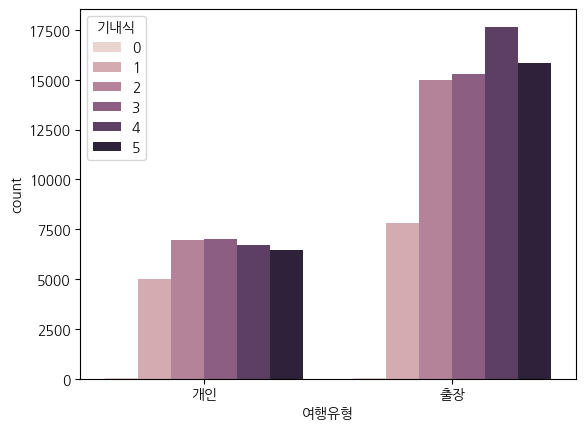

In [ ]:
sns.countplot(train_ft, x = "여행유형", hue="기내식")
plt.show()

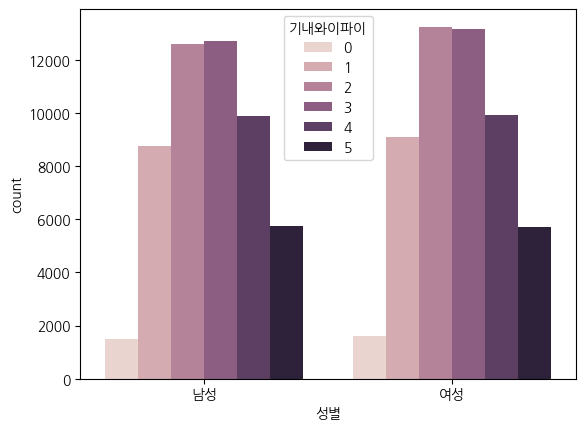

In [ ]:
sns.countplot(train_ft, x = "성별", hue="기내와이파이")
plt.show()

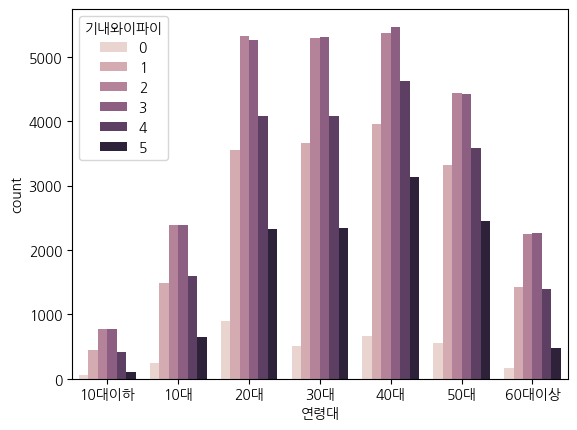

In [ ]:
sns.countplot(train_ft, x = "연령대", hue="기내와이파이")
plt.show()

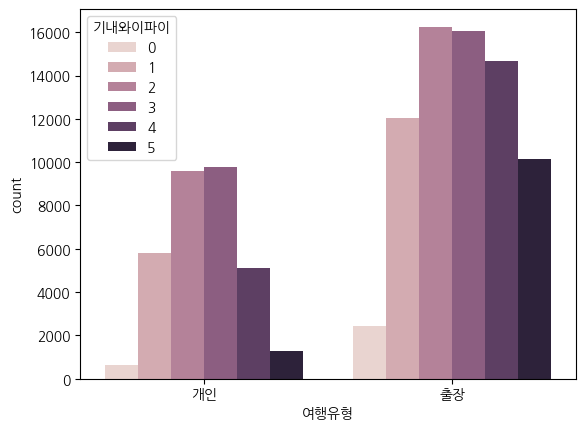

In [ ]:
sns.countplot(train_ft, x = "여행유형", hue="기내와이파이")
plt.show()

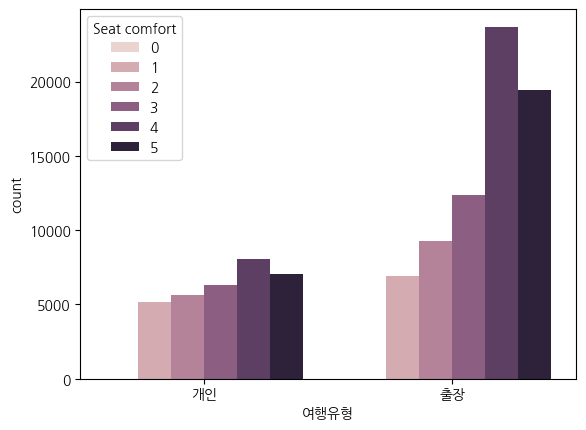

In [ ]:
sns.countplot(train_ft, x = "여행유형", hue="Seat comfort")
plt.show()

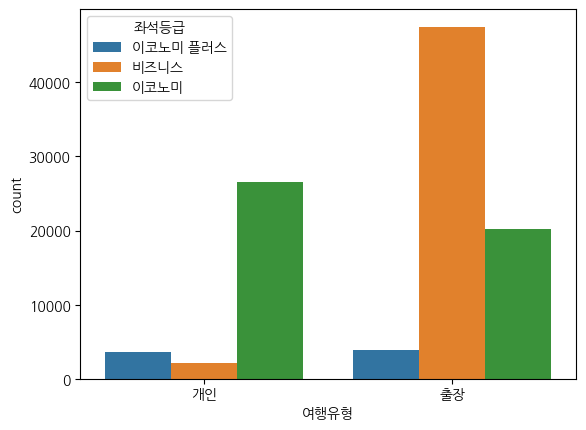

In [ ]:
sns.countplot(train_ft, x = "여행유형", hue="좌석등급")
plt.show()

# 특성 공학(Feature Engineering)

## 범주형 데이터

## 인코딩

In [ ]:
# train_ft['성별'] = (train['성별'] == '남성').astype(int)
train_ft['고객유형'] = (train['고객유형'] == 'Loyal Customer').astype(int)
train_ft['여행유형'] = (train['여행유형'] == 'Business travel').astype(int)

# test_ft['성별'] = (train['성별'] == 'Male').astype(int)
test_ft['고객유형'] = (train['고객유형'] == 'Loyal Customer').astype(int)
test_ft['여행유형'] = (train['여행유형'] == 'Business travel').astype(int)

In [ ]:
mask = {'이코노미 플러스': 0, '비즈니스': 1, '이코노미': 2}
cols = ['좌석등급']

train_ft[cols] = train_ft[cols].map(mask.get)
test_ft[cols] = test_ft[cols].map(mask.get)

In [ ]:
train_ft.head(10)

,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,Ease of Online booking,...,Seat comfort,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연
0,70172,0,0,13,0,0,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,0,0,25,0,1,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,0,0,26,0,1,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,0,0,25,0,1,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,0,0,61,0,1,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
5,111157,0,0,26,0,2,1180,3,4,2,...,1,1,3,4,4,4,4,1,0,0.0
6,82113,0,0,47,0,2,1276,2,4,2,...,2,2,3,3,4,3,5,2,9,23.0
7,96462,0,0,52,0,1,2035,4,3,4,...,5,5,5,5,5,4,5,4,4,0.0
8,79485,0,0,41,0,1,853,1,2,2,...,3,1,1,2,1,4,1,2,0,0.0
9,65725,0,0,20,0,2,1061,3,3,3,...,3,2,2,3,4,4,3,2,0,0.0


In [ ]:
test_ft.head(10)

,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,Ease of Online booking,...,Seat comfort,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연
0,19556,0,0,52,0,2,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,0,0,36,0,1,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,0,0,20,0,2,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,0,0,44,0,1,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,0,0,49,0,2,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0
5,39177,0,0,16,0,2,311,3,3,3,...,3,5,4,3,1,1,2,5,0,0.0
6,79433,0,0,77,0,1,3987,5,5,5,...,5,5,5,5,5,4,5,3,0,0.0
7,97286,0,0,43,0,1,2556,2,2,2,...,5,4,4,4,4,5,4,3,77,65.0
8,27508,0,0,47,0,2,556,5,2,2,...,5,5,2,2,5,3,3,5,1,0.0
9,62482,0,0,46,0,1,1744,2,2,2,...,4,4,4,4,4,5,4,4,28,14.0


In [ ]:
train_ft.isnull().sum()

,0
승객ID,0
성별,0
고객유형,0
나이,0
여행유형,0
좌석등급,0
비행거리,0
기내와이파이,0
시간편리성,0
Ease of Online booking,0


## 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.540280,1.0,1.0,0.076923,0.0,0.0,0.086632,0.6,0.8,0.6,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,0.038852,1.0,0.0,0.230769,1.0,0.5,0.041195,0.6,0.4,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.847150,0.0,1.0,0.243590,1.0,0.5,0.224354,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.184980,0.0,1.0,0.230769,1.0,0.5,0.107229,0.4,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,0.918532,1.0,1.0,0.692308,1.0,0.5,0.036955,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000


# XAI

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(5, shuffle=True, random_state=SEED)

In [ ]:
model = LGBMClassifier(random_state=SEED)
cross_val_score(model, train_ft, target, cv=cv, n_jobs=-1, scoring="roc_auc")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


array([0.99518679, 0.99492868, 0.99430556, 0.99554105, 0.99528992])

In [ ]:
model.fit(train_ft, target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 45025, number of negative: 58879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268267
[LightGBM] [Info] Start training from score -0.268267


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=42)

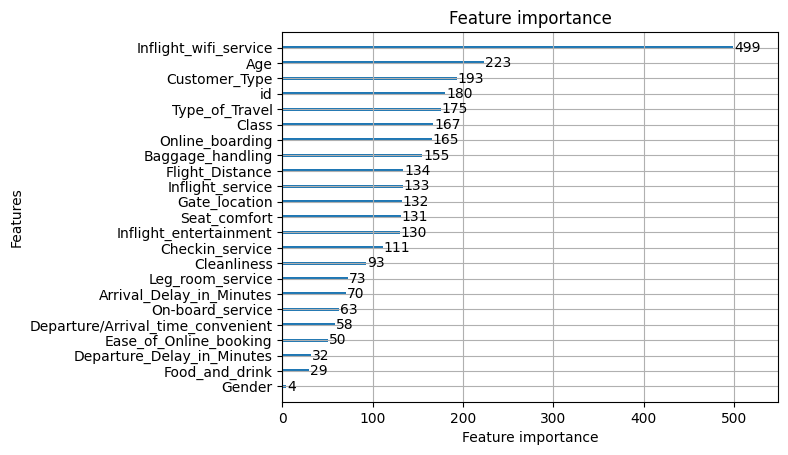

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
plot_importance(model)
plt.show()

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(test_ft)
shap_values

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


array([[ 8.82784475e-02, -9.76335450e-04,  1.97699220e-01, ...,
         1.42368267e-01,  1.31561874e-02, -2.68697442e-01],
       [-4.92077933e-02,  2.01765214e-04, -3.99630291e+00, ...,
         2.75920343e-01, -8.22600234e-03,  1.60079009e-02],
       [ 4.70201574e-01,  2.91894167e-04,  6.24957418e-01, ...,
        -1.39940081e-01, -1.60276683e-02,  1.65046963e-01],
       ...,
       [ 1.89032961e-01, -5.41983623e-04,  1.33093379e+00, ...,
        -1.23745279e-01, -1.81775194e-02,  2.66610870e-01],
       [-1.26530674e-01,  3.23436672e-05,  6.60569245e-01, ...,
         1.02647274e-01, -1.54726271e-02,  1.13493942e-01],
       [ 4.52312003e-01,  3.67799636e-03,  6.00107973e-01, ...,
        -1.58992532e-01, -6.54707720e-03,  1.72789454e-01]])

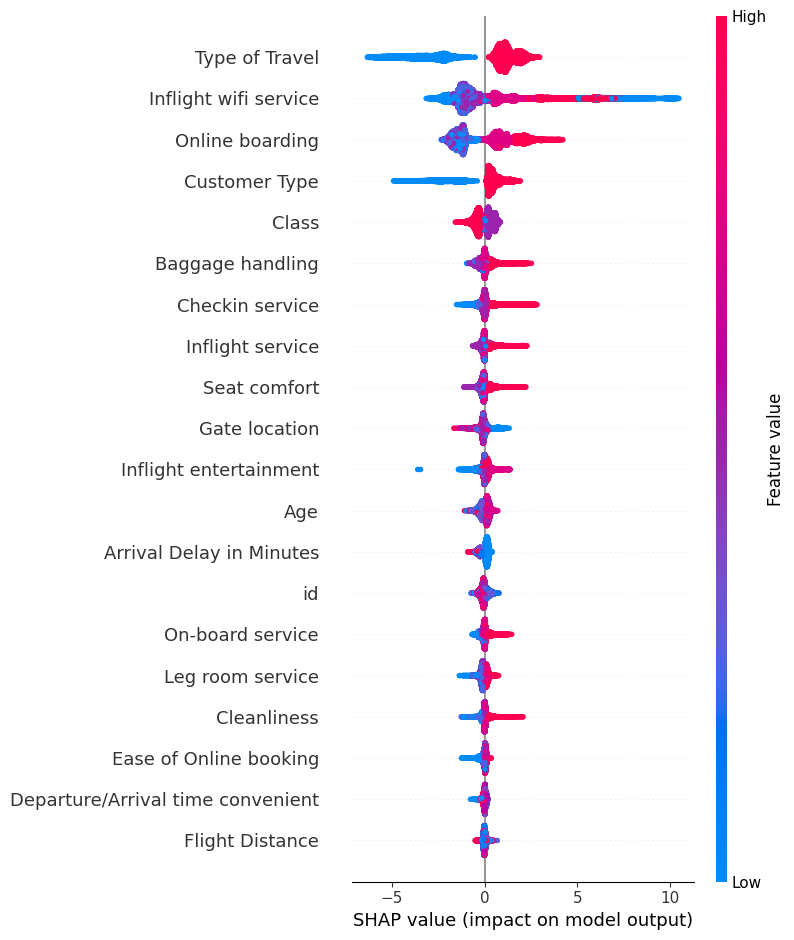

In [ ]:
shap.summary_plot(shap_values, test_ft)

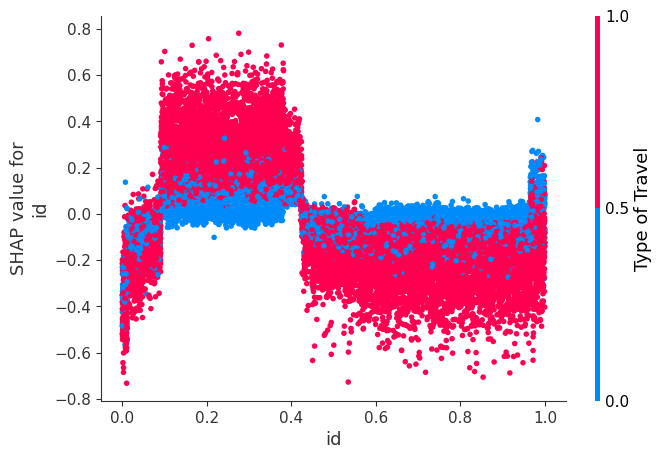

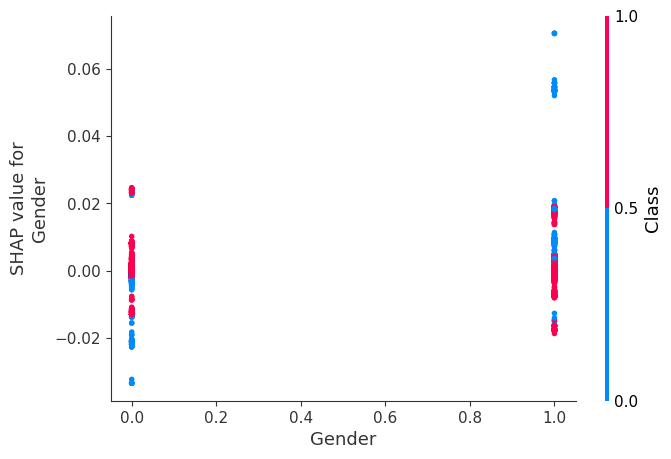

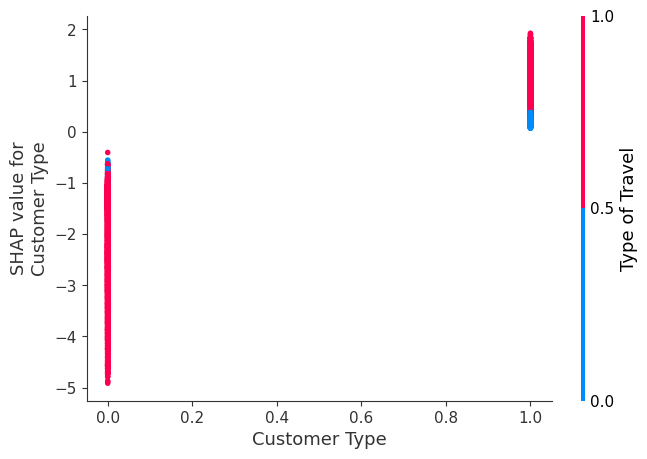

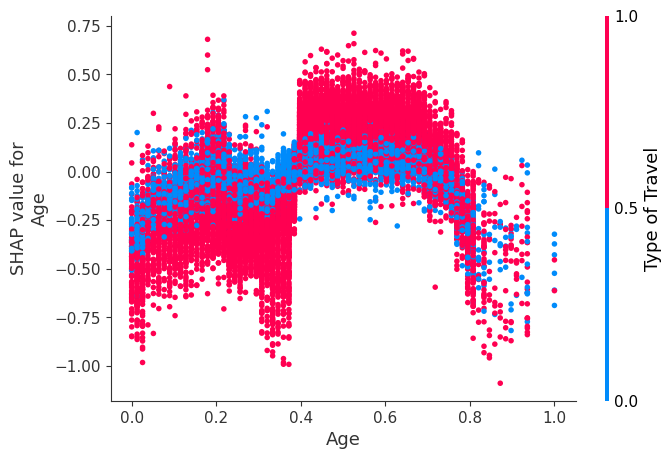

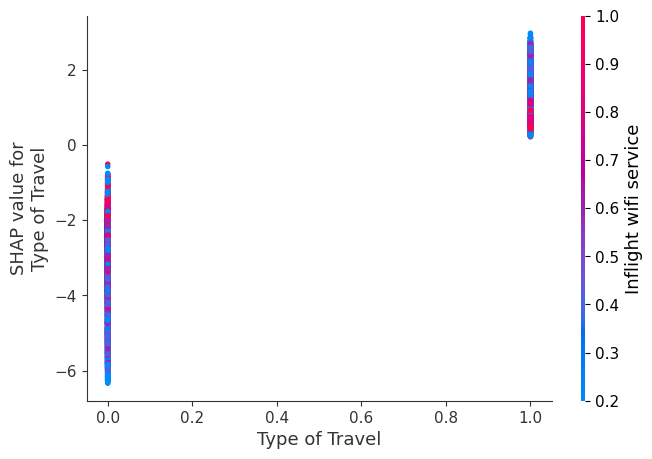

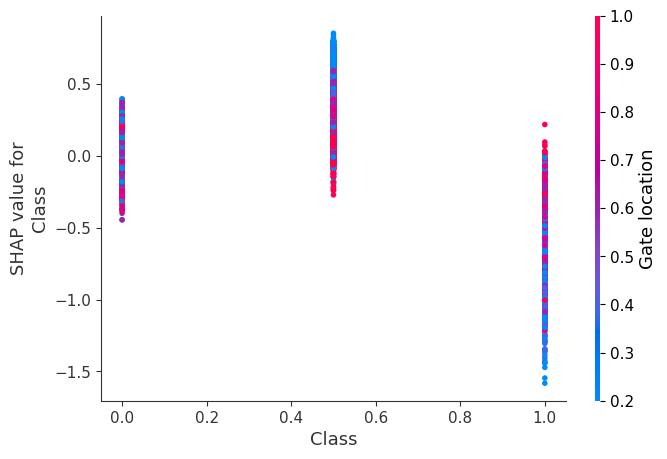

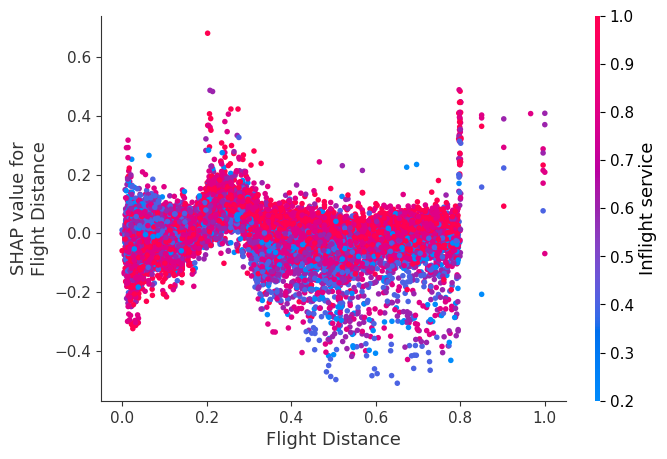

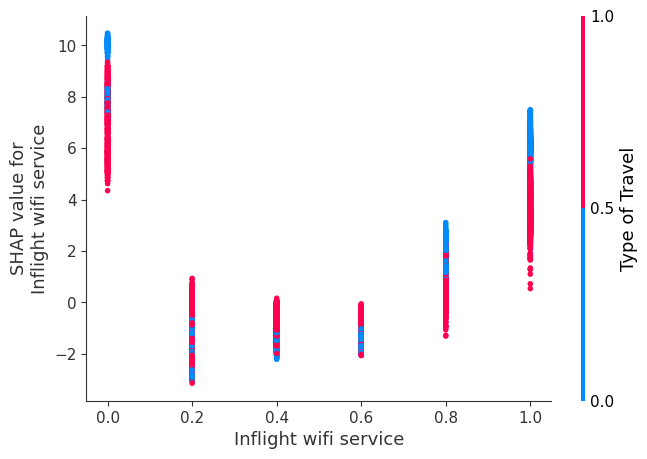

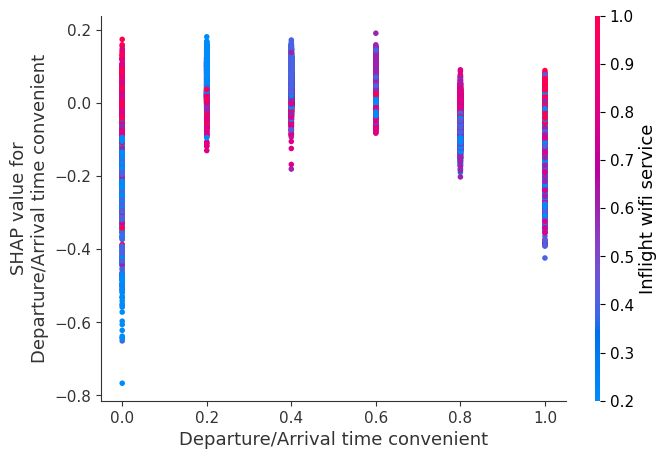

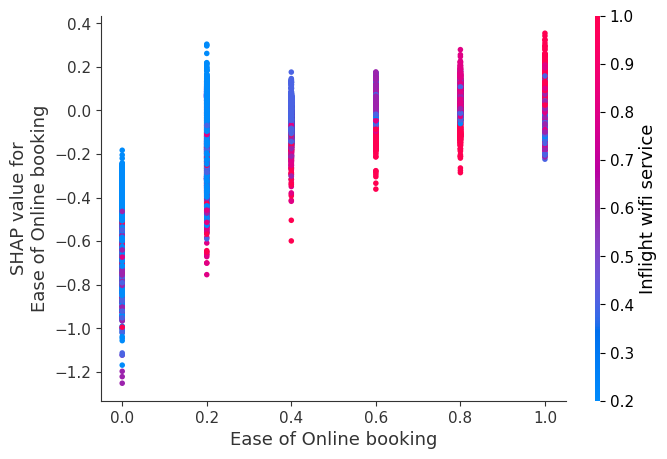

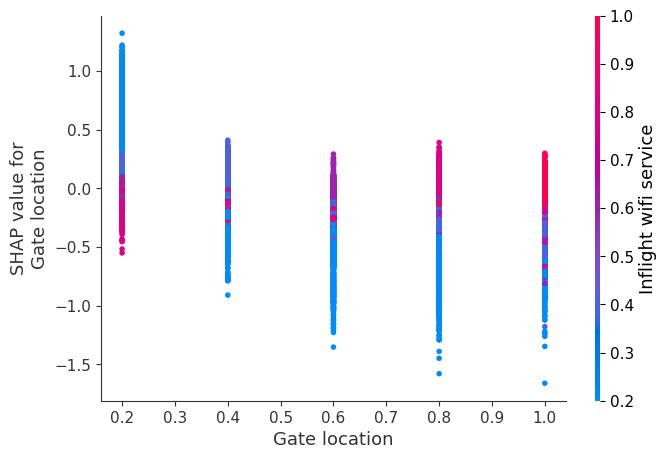

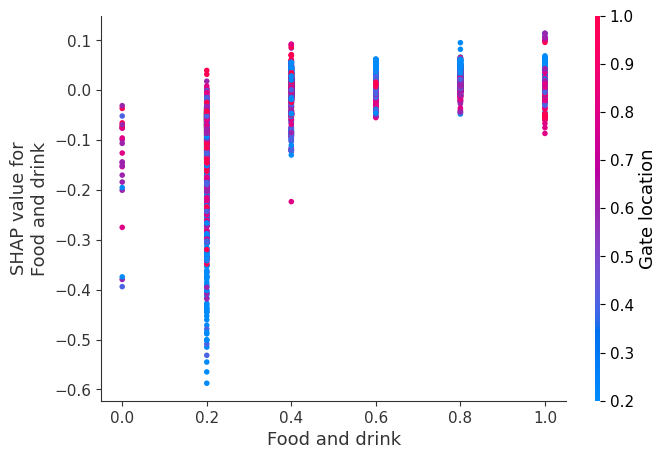

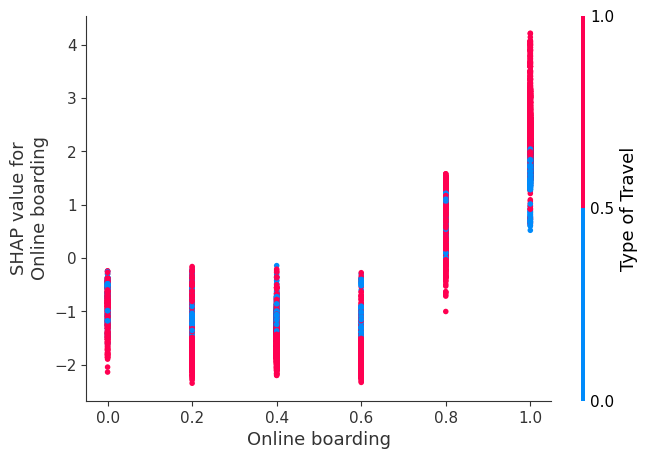

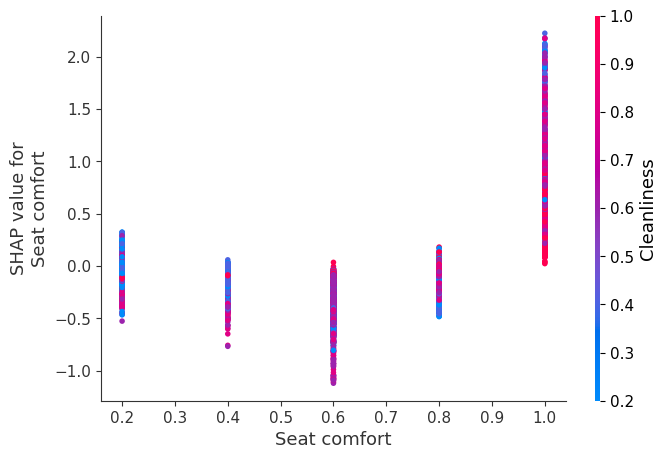

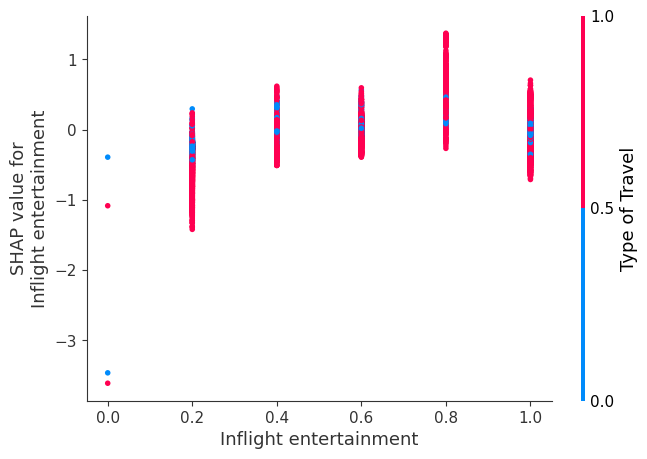

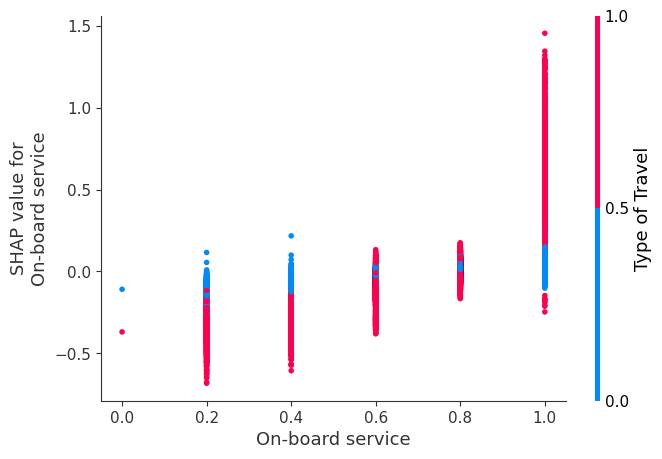

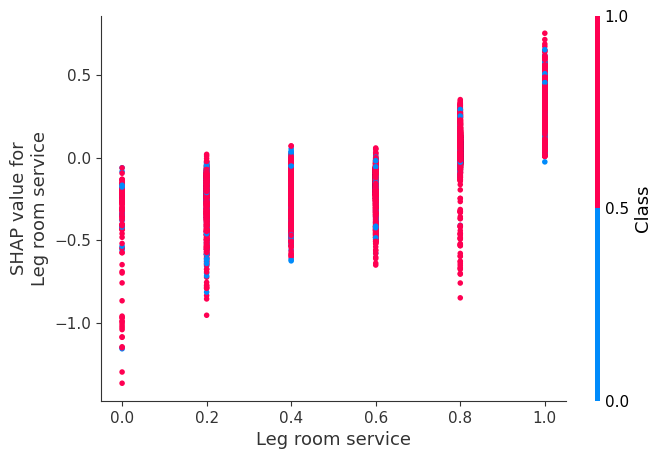

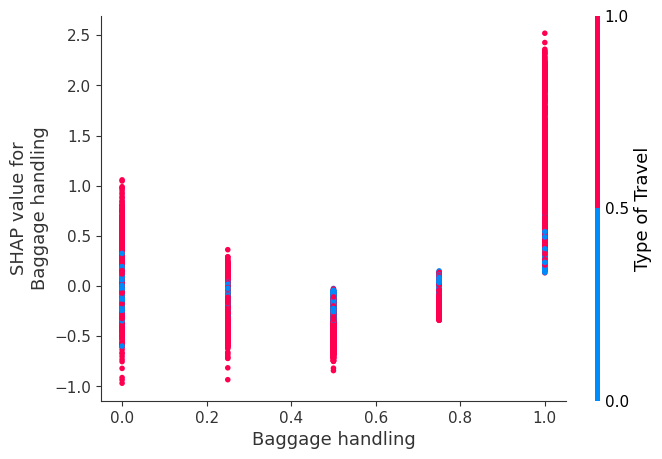

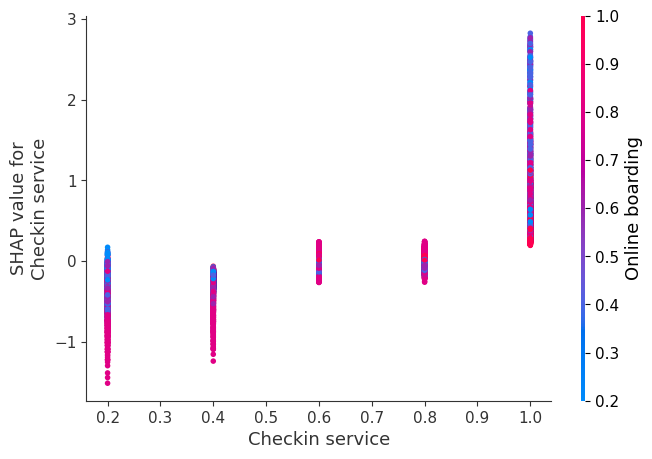

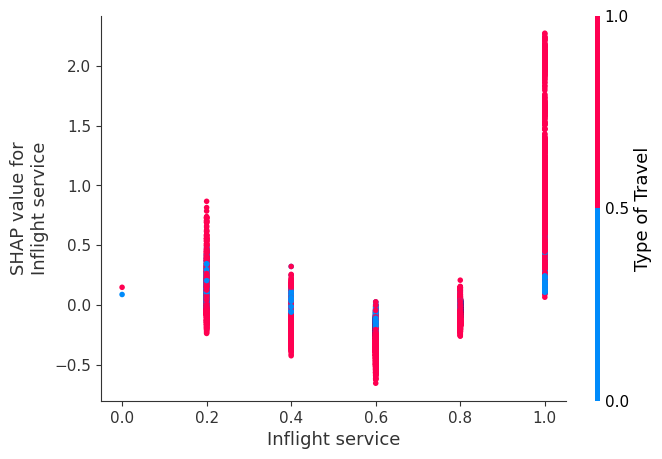

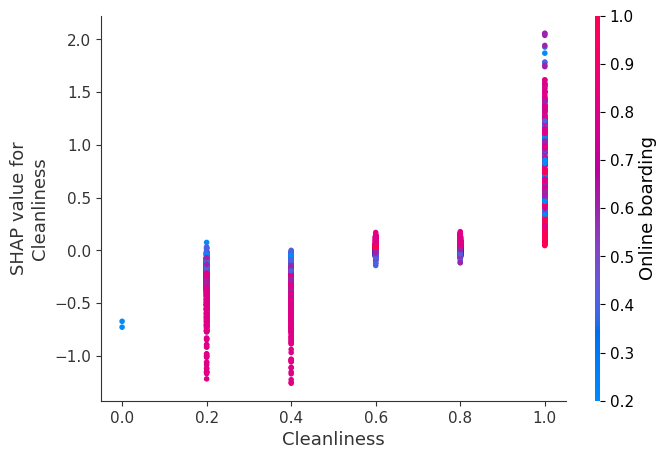

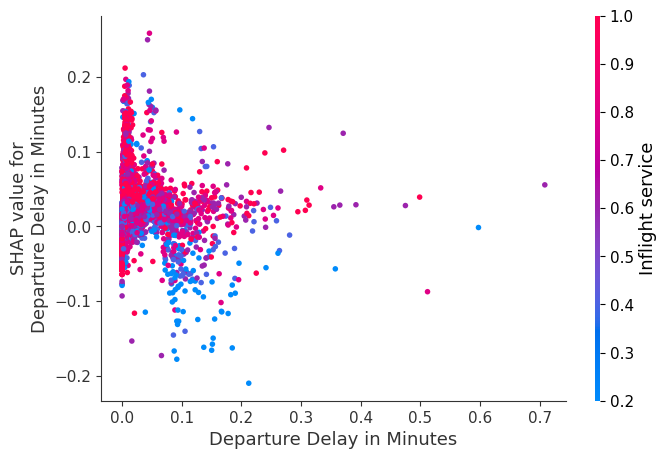

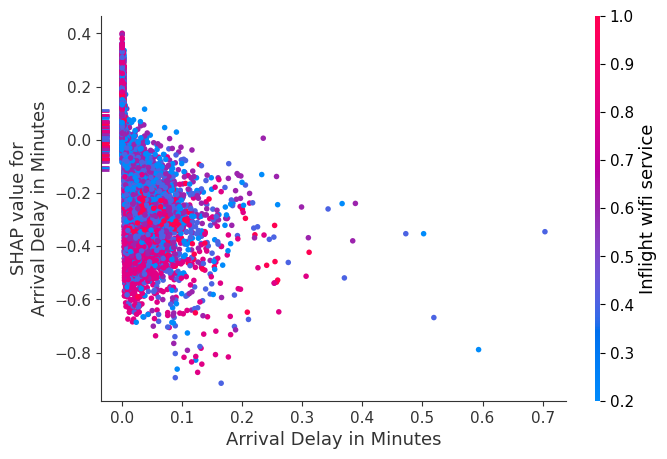

In [ ]:
for col in test_ft.columns:
    shap.dependence_plot(col, shap_values, test_ft)
    print()

# seaborn

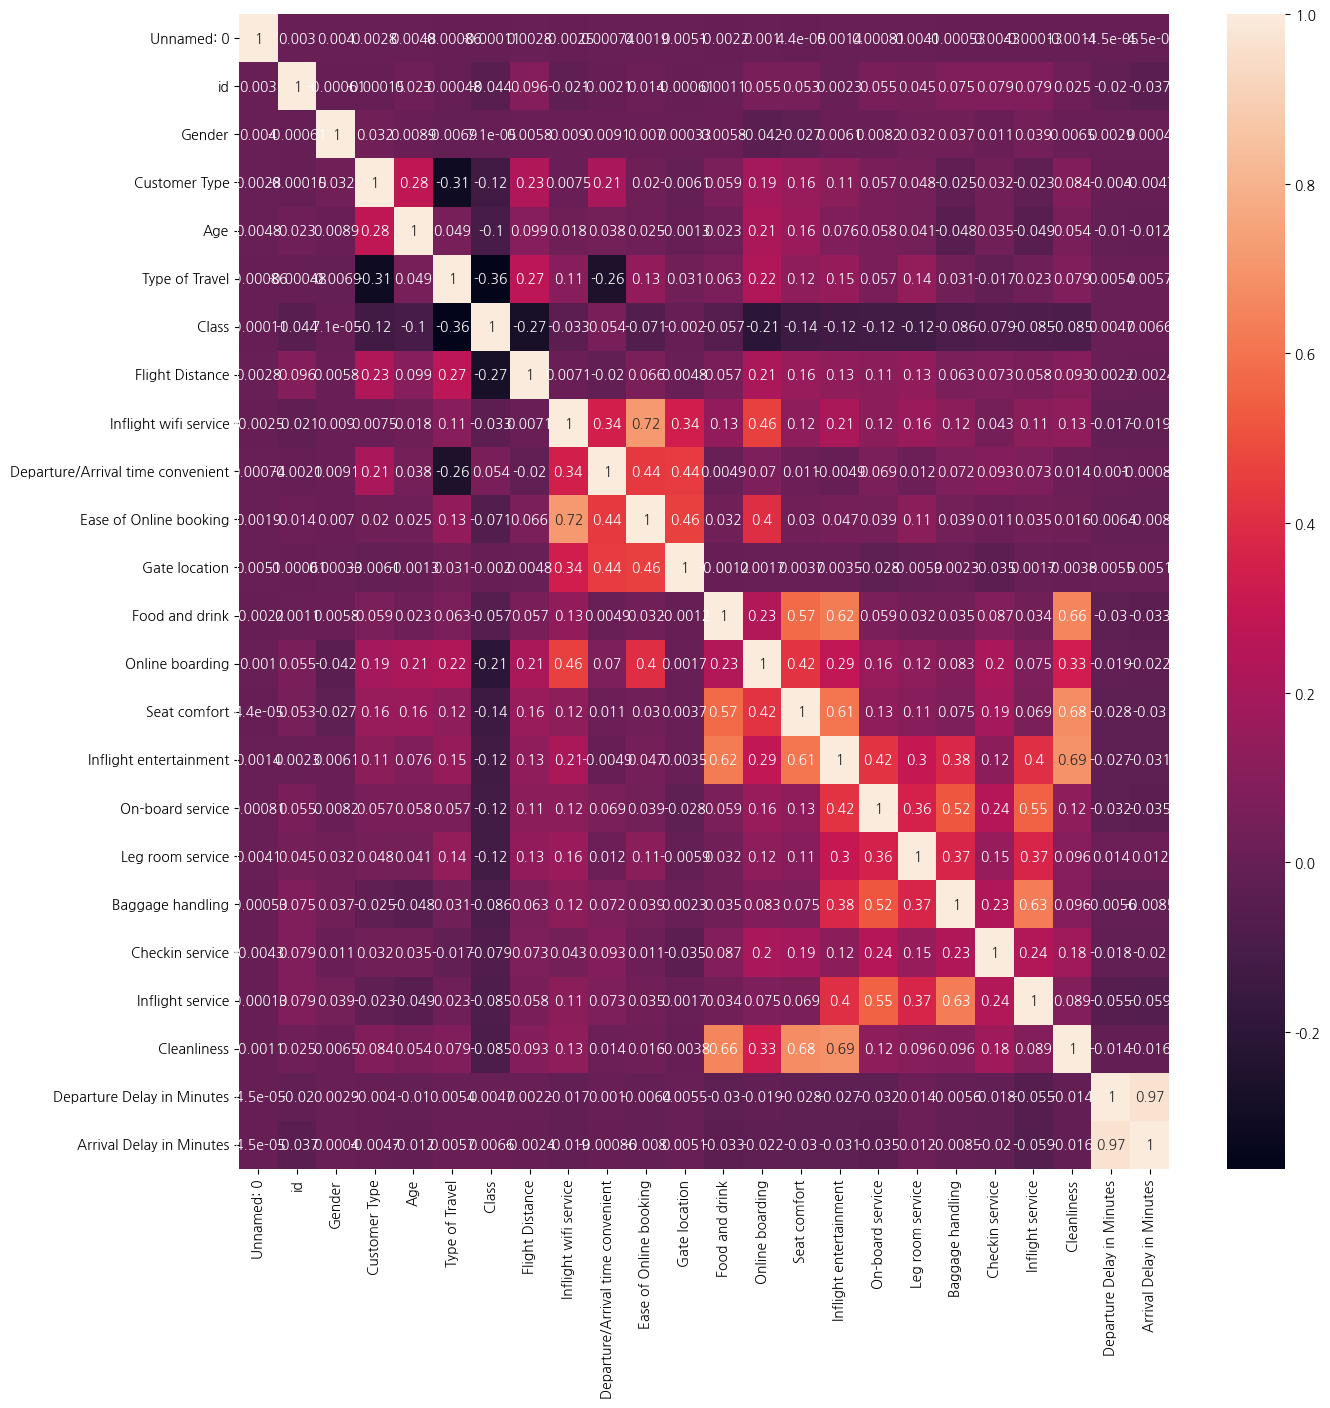

In [ ]:
fig, ax = plt.subplots(figsize=[15,15])
sns.heatmap(train_ft.corr(numeric_only=True), annot=True , ax= ax )
plt.show()

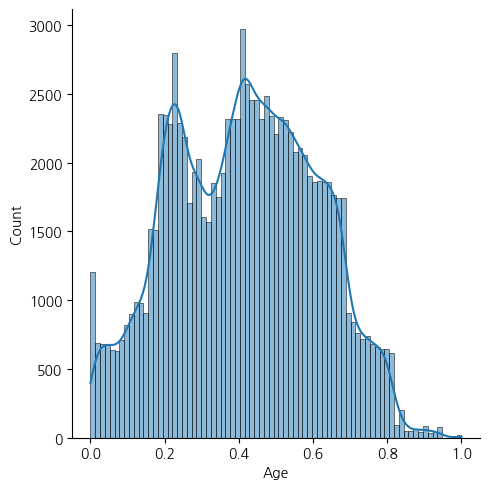

In [ ]:
sns.displot(train_ft['Age'], kde=True)
plt.show()

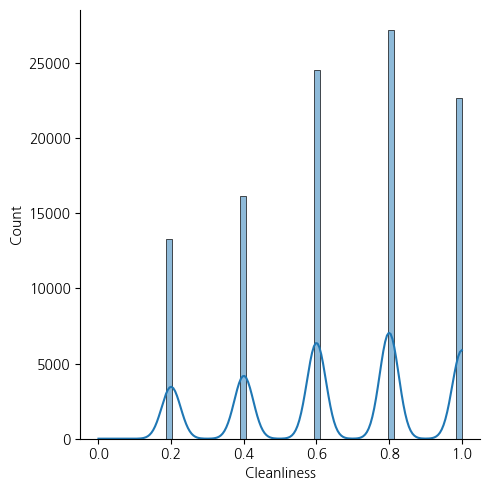

In [ ]:
sns.displot(train_ft['Cleanliness'], kde=True)  # 청결 만족도
plt.show()

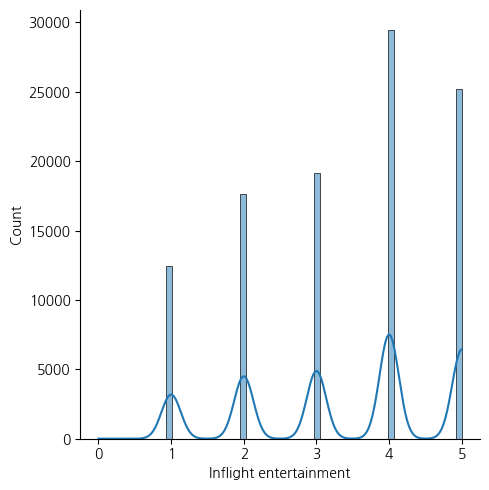

In [ ]:
sns.displot(train_ft['Inflight entertainment'], kde=True)  # 청결 만족도
plt.show()

In [ ]:
tmp = pd.DataFrame(target)
tmp

,satisfaction
0,1
1,1
2,0
3,1
4,0
...,...
103899,1
103900,0
103901,1
103902,1


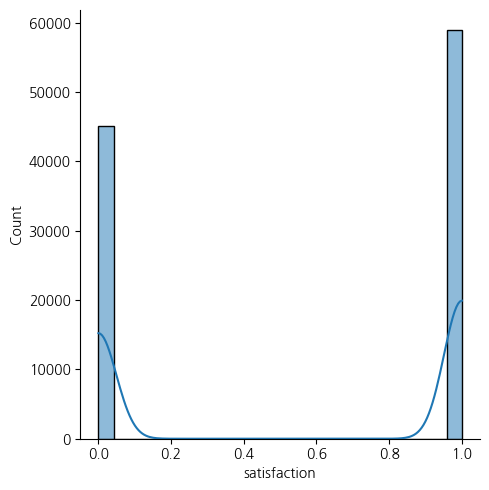

In [ ]:
sns.displot(tmp['satisfaction'], kde=True)  # 만족도
plt.show()

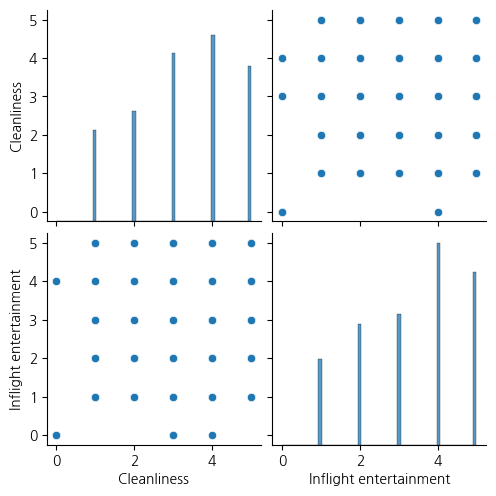

In [ ]:
cols = ["Cleanliness", "satisfaction", 'Inflight entertainment']
sns.pairplot(train_ft[cols])
plt.show()

# 항상 확인하기
- 학습데이터와 테스트 데이터의 피처개수는 동일해야 함

In [ ]:
train_ft.shape

# 추출한 피처 저장하기

In [ ]:
train_ft.to_csv(f"{DATA_PATH}train_common.csv",index=False)
# test_ft.to_csv(f"{DATA_PATH}test_common.csv",index=False)